In [1]:
import models
from models import get_raw_data, extrair_indicadores, indicadores_frequencia, get_rpm, filtro_passa_baixa
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
# pasta ='database/dados_brutos/normal'

# pasta ='database/dados_brutos/horizontal-misalignment/0.5mm'
# pasta ='database/dados_brutos/horizontal-misalignment/1.0mm'
# pasta ='database/dados_brutos/horizontal-misalignment/1.5mm'
# pasta ='database/dados_brutos/horizontal-misalignment/2.0mm'

# pasta ='database/dados_brutos/imbalance/6g'
# pasta ='database/dados_brutos/imbalance/10g'
# pasta ='database/dados_brutos/imbalance/15g'
# pasta ='database/dados_brutos/imbalance/20g'
# pasta ='database/dados_brutos/imbalance/25g'
# pasta ='database/dados_brutos/imbalance/30g'
# pasta ='database/dados_brutos/imbalance/35g'

# pasta ='database/dados_brutos/overhang/ball_fault/0g'
# pasta ='database/dados_brutos/overhang/ball_fault/6g'
# pasta ='database/dados_brutos/overhang/ball_fault/20g'
# pasta ='database/dados_brutos/overhang/ball_fault/35g'

# pasta ='database/dados_brutos/overhang/cage_fault/0g'
# pasta ='database/dados_brutos/overhang/cage_fault/6g'
# pasta ='database/dados_brutos/overhang/cage_fault/20g'
# pasta ='database/dados_brutos/overhang/cage_fault/35g'

# pasta ='database/dados_brutos/overhang/outer_race/0g'
# pasta ='database/dados_brutos/overhang/outer_race/6g'
# pasta ='database/dados_brutos/overhang/outer_race/20g'
# pasta ='database/dados_brutos/overhang/outer_race/35g'
 
# pasta ='database/dados_brutos/underhang/ball_fault/0g'
# pasta ='database/dados_brutos/underhang/ball_fault/6g'
# pasta ='database/dados_brutos/underhang/ball_fault/20g'
# pasta ='database/dados_brutos/underhang/ball_fault/35g'

# pasta ='database/dados_brutos/underhang/cage_fault/0g'
# pasta ='database/dados_brutos/underhang/cage_fault/6g'
# pasta ='database/dados_brutos/underhang/cage_fault/20g'
# pasta ='database/dados_brutos/underhang/cage_fault/35g'

# pasta ='database/dados_brutos/underhang/outer_race/0g'
# pasta ='database/dados_brutos/underhang/outer_race/6g'
# pasta ='database/dados_brutos/underhang/outer_race/20g'
pasta ='database/dados_brutos/underhang/outer_race/35g'

In [3]:
arquivos = os.listdir(pasta) # for n2
arquivo = arquivos[-1] # for n3
sensor = 'rolamento_interno_radial1'
coluna = models.sensores[sensor]

frequencia_de_referencia = models.frequencias_rolamento
dataframe = []
ordens_frequencia = 5
largura_banda = 2

In [4]:
sinal = get_raw_data.GetData(pasta,arquivo,coluna).Get()
sinal_rpm = get_raw_data.GetData(pasta,arquivo,0).Get()

rpm = get_rpm.GetRPM(sinal_rpm).get_rpm_medio()

for i in range(len(frequencia_de_referencia)):
    frequencia_de_referencia[i] = frequencia_de_referencia[i]*rpm
    
rpm

55.37098560354376

In [5]:
Objeto_Frequencia = indicadores_frequencia.DominioFrequencia(sinal,rpm)



c:\Users\leona\Documents\ProjetoFinal_LeonardoPacheco_UFRJ_LAVI\.venv\lib\site-packages\matplotlib\transforms.py:2865: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])
c:\Users\leona\Documents\ProjetoFinal_LeonardoPacheco_UFRJ_LAVI\.venv\lib\site-packages\numpy\ma\core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


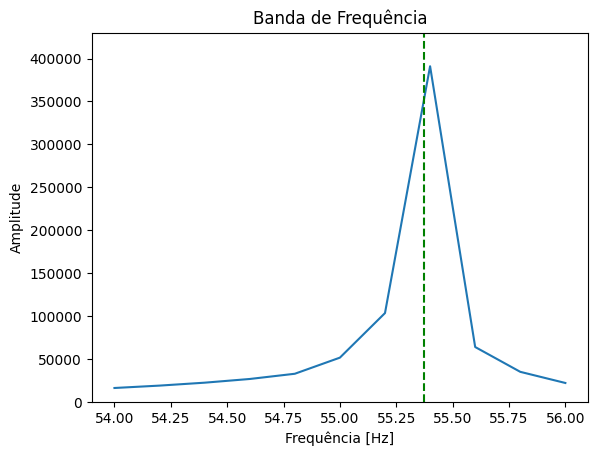

In [6]:
Objeto_Frequencia.plot_banda(rpm,2)

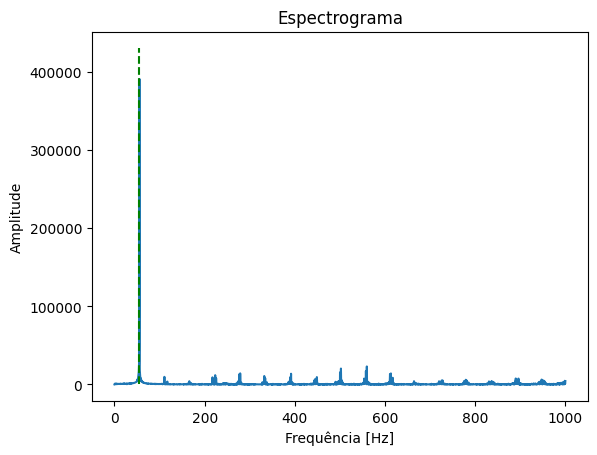

In [7]:
Objeto_Frequencia.plot_fft()

In [8]:
sinal_filtrado = filtro_passa_baixa.Filtro(sinal,10000,5).FiltroPassaBaixa()


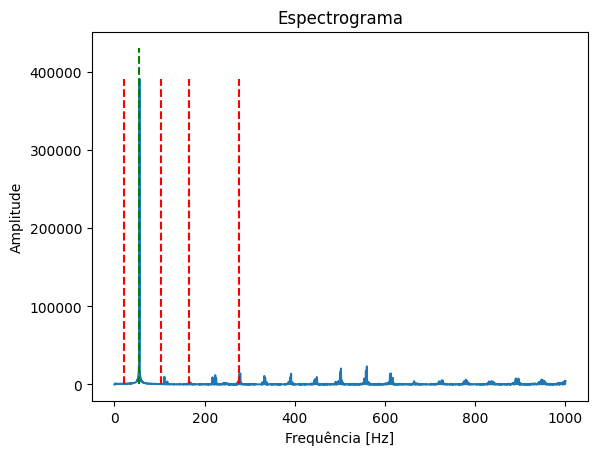

In [9]:
Objeto_Frequencia = indicadores_frequencia.DominioFrequencia(sinal_filtrado,rpm)
Objeto_Frequencia.plot_fft(frequencia_de_referencia)

In [10]:
for freq in frequencia_de_referencia:
    freq = np.round(freq,1)
    fourier_banda, frequencia_banda = Objeto_Frequencia.banda_frequencia(freq,2)
    soma = np.round(np.real(Objeto_Frequencia.soma_sinal(fourier_banda)),1)
    print(f'frequencia {freq} Hz - soma = {soma}')

frequencia 103.6 Hz - soma = 5645.7
frequencia 20.8 Hz - soma = 8705.9
frequencia 166.0 Hz - soma = 11599.8
frequencia 277.0 Hz - soma = 27325.0


In [11]:
Objeto_Extrair = extrair_indicadores.ExtrairIndicadores(pasta,
                                                        arquivo,
                                                        1,
                                                        frequencia_de_referencia,
                                                        defeito = 'normal',
                                                        sensor = sensor)

In [12]:
pd.json_normalize(Objeto_Extrair.Get())

,rotacao_hz,maximo,rms,assimetria,curtose,soma_ball_fault,soma_cage_fault,soma_outer_race,soma_inner_race,sensor,defeito
0,55.370986,4.1764,1.462919,0.262435,0.738725,4573.485822,3116.46368,62381.061313,59399.684842,rolamento_interno_radial1,normal
